In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import scienceplots
#plt.style.use(['science', 'no-latex'])

## Gráfica de posición, velocidad y aceleración

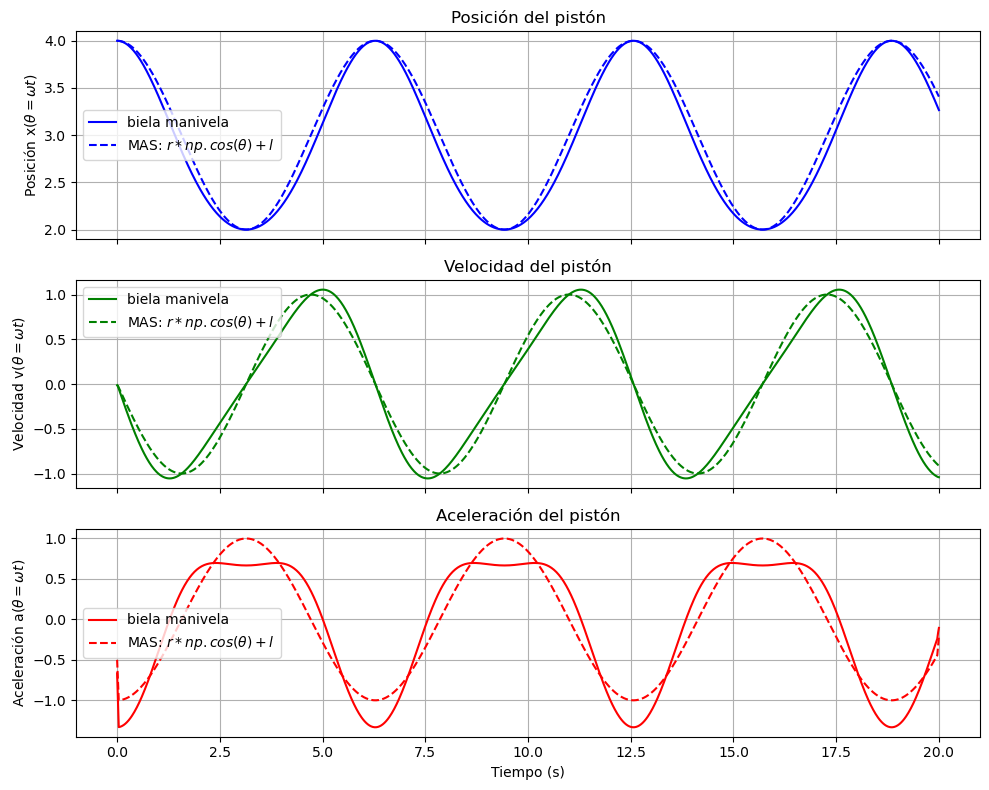

In [33]:
# Parámetros del sistema
r = 1.0   # Longitud de la manivela
l = 3.0   # Longitud de la biela
w = 1 # frecuencia angular

t =  np.linspace(0, 20, 1000)
theta = w*t # Ángulo de giro de la manivela

# Posición del pistón usando trigonometría
x = r * np.cos(theta) + np.sqrt(l**2 - (r * np.sin(theta))**2)
xsin = r*np.cos(theta) + l


# Velocidad (derivada numérica
v = np.gradient(x, t)
vsin = np.gradient(xsin,t)

# Aceleración (segunda derivada numérica)
a = np.gradient(v, t)
asin = np.gradient(vsin,t)

# Graficar
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axs[0].plot(t, x, color='blue',label="biela manivela")
axs[0].plot(t, xsin,'--', color='blue',label=r"MAS: $r*np.cos(\theta) + l$")
axs[0].set_ylabel(r'Posición x($ \theta=\omega t$)')
axs[0].legend()
axs[0].grid()
axs[0].set_title(r'Posición del pistón')

axs[1].plot(t, v, color='green',label="biela manivela")
axs[1].plot(t, vsin,'--', color='green',label=r"MAS: $r*np.cos(\theta) + l$")
axs[1].set_ylabel(r'Velocidad v($\theta=\omega t$)')
axs[1].legend()
axs[1].grid()
axs[1].set_title('Velocidad del pistón')

axs[2].plot(t, a, color='red',label="biela manivela")
axs[2].plot(t, asin,'--', color='red',label=r"MAS: $r*np.cos(\theta) + l$")
axs[2].set_ylabel(r'Aceleración a($\theta=\omega t$)')
axs[2].set_xlabel('Tiempo (s)')
axs[2].grid()
axs[2].legend()
axs[2].set_title('Aceleración del pistón')

plt.tight_layout()
plt.savefig("MAS-biela-manivela")
plt.show()

## Cargar archivos

In [75]:
data = np.genfromtxt("./experimento-biela-manivela/datos-biela-manivela.txt", skip_header=3)
# Separar columnas 
tiempo = data[:, 0]
angulo = data[:, 1]
vel_ang = data[:, 2]
acel_ang = data[:, 3]
posicion = data[:, 4]
vel = data[:, 5]
acel = data[:, 6]

[]

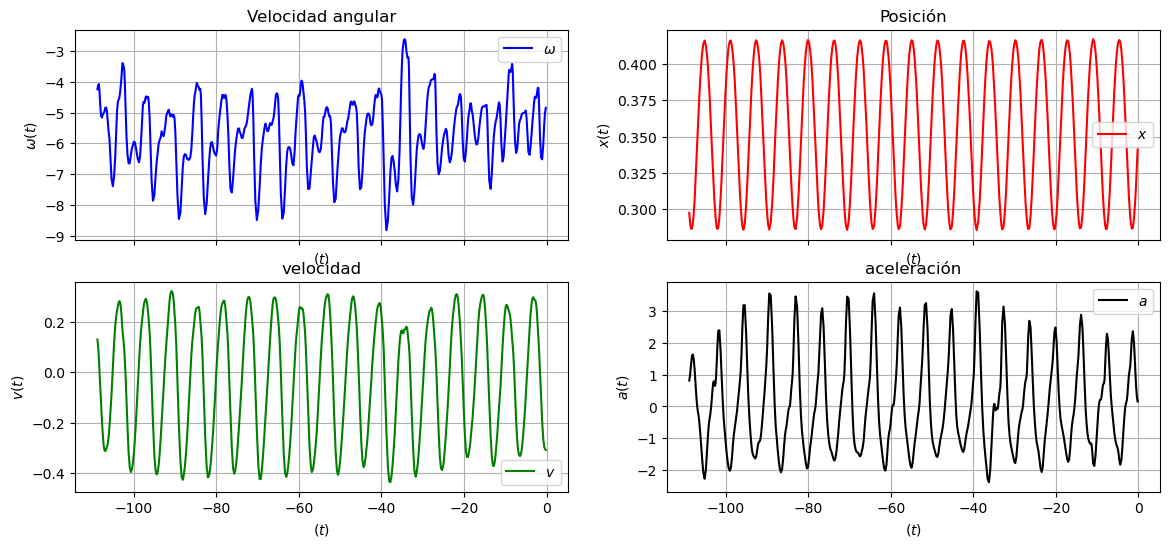

In [68]:
# Graficar
fig, axs = plt.subplots(2, 2, figsize=(14, 6), sharex=True)

axs[0,0].plot(angulo, vel_ang, color='blue',label=r"$\omega$")
axs[0,0].set_ylabel(r'$\omega(t)$')
axs[0,0].set_xlabel(r'$(t)$')
axs[0,0].legend()
axs[0,0].grid()
axs[0,0].set_title(r'Velocidad angular')

axs[0,1].plot(angulo, posicion, color='red',label=r"$x$")
axs[0,1].set_ylabel(r'$x(t)$')
axs[0,1].set_xlabel(r'$(t)$')
axs[0,1].legend()
axs[0,1].grid()
axs[0,1].set_title(r'Posición')

axs[1,0].plot(angulo, vel, color='green',label=r"$v$")
axs[1,0].set_ylabel(r'$v(t)$')
axs[1,0].set_xlabel(r'$(t)$')
axs[1,0].legend()
axs[1,0].grid()
axs[1,0].set_title(r'velocidad')

axs[1,1].plot(angulo, acel, color='black',label=r"$a$")
axs[1,1].set_ylabel(r'$a(t)$')
axs[1,1].set_xlabel(r'$(t)$')
axs[1,1].legend()
axs[1,1].grid()
axs[1,1].set_title(r'aceleración')


plt.plot()

## Aplicar la FFT 

✅ Primer armónico (~1): frecuencia=0.997, amplitud=0.032
✅ Primer armónico (~1): frecuencia=1.047, amplitud=0.070
✅ Segundo armónico (~2): frecuencia=1.994, amplitud=0.058
✅ Segundo armónico (~2): frecuencia=2.044, amplitud=0.015


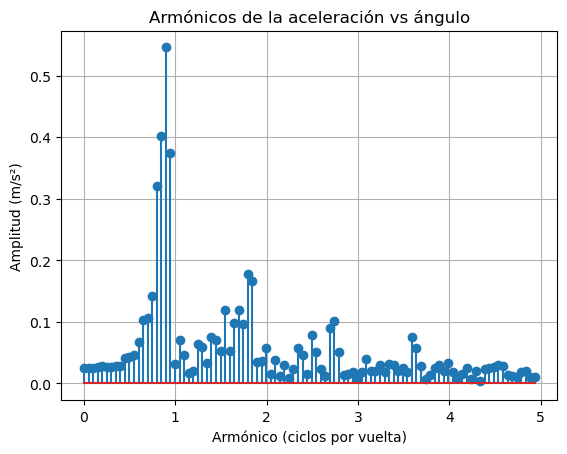

In [119]:
from scipy.interpolate import interp1d

# 1. Tu señal original
theta = tiempo   # tu columna de ángulos (en radianes)
accel = acel      # tu columna de aceleración (en m/s²)

# 2. Crear malla uniforme en theta
N_uniform = 200  # o mismo número que tenés, pero ahora con paso constante
theta_uniform = np.linspace(np.min(theta), np.max(theta), N_uniform)

# 3. Interpolar la aceleración en esa malla
interp = interp1d(theta, accel, kind='cubic')  # o 'linear' si querés algo más simple
accel_uniform = interp(theta_uniform)


#accel_uniform = accel
#theta_uniform = theta

# 4. FFT
fft_result = np.fft.fft(accel_uniform)
amplitudes = np.abs(fft_result) / N_uniform
frequencies = np.fft.fftfreq(N_uniform, d=(theta_uniform[1] - theta_uniform[0]))

# 👇 Aquí insertás el código para detectar armónicos
for i, (freq, amp) in enumerate(zip(frequencies[:N_uniform//2], amplitudes[:N_uniform//2])):
    if np.isclose(freq, 1.0, atol=0.05):
        print(f"✅ Primer armónico (~1): frecuencia={freq:.3f}, amplitud={amp:.3f}")
    if np.isclose(freq, 2.0, atol=0.05):
        print(f"✅ Segundo armónico (~2): frecuencia={freq:.3f}, amplitud={amp:.3f}")

# 5. Graficar
plt.stem(frequencies[:N_uniform // 2], amplitudes[:N_uniform // 2])
plt.xlabel("Armónico (ciclos por vuelta)")
plt.ylabel("Amplitud (m/s²)")
plt.title("Armónicos de la aceleración vs ángulo")
#plt.xlim(0, 0.3)
plt.grid(True)
plt.show()

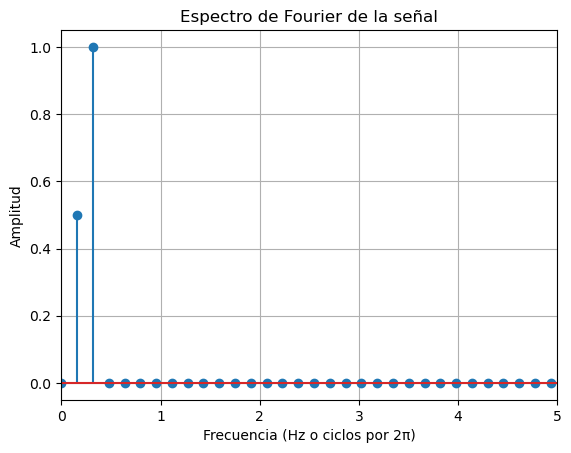

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Señal
N = 1000
t = np.linspace(0, 2*np.pi, N, endpoint=False)
signal = np.sin(t) + 2*np.sin(2*t)

# DFT
fft_result = np.fft.fft(signal)
amplitudes = np.abs(fft_result) / N
frequencies = np.fft.fftfreq(N, d=(t[1] - t[0]))

# Graficar solo parte positiva
plt.stem(frequencies[:N//2], amplitudes[:N//2])
plt.xlabel("Frecuencia (Hz o ciclos por 2π)")
plt.ylabel("Amplitud")
plt.title("Espectro de Fourier de la señal")
plt.grid(True)
plt.xlim(0, 5)
plt.show()